In [1]:
from functools import partial

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from IPython import display

matplotlib.rcParams['figure.figsize'] = (18, 12)
matplotlib.rcParams['figure.titlesize'] = 24
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['legend.fontsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 28
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 17
matplotlib.rcParams['ytick.labelsize'] = 17
matplotlib.rcParams['axes.grid'] = True

In [3]:
import torch

In [4]:
from net import ResNet20
from train import train_epoch

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [18]:
def plot_error_history(ax, test_accuracies, ymin=0.07, ymax=0.5):
    ax.cla()
    ax.plot(1 - np.array(test_accuracies), '-o')
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('Эпоха')
    ax.set_ylabel('Ошибка на тестовом сете')
    ax.hlines(0.1,0, len(test_accuracies), colors='r', linestyle='dotted', linewidth=4)
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [6]:
res_net = ResNet20()
res_net = res_net.cuda()

In [7]:
criterion = torch.nn.CrossEntropyLoss()

In [8]:
test_accuracies = []

In [9]:
n_epochs_with_constant_learning_rate = 70

### Устанавливаем learning rate = 0.1

In [10]:
lr = 0.1

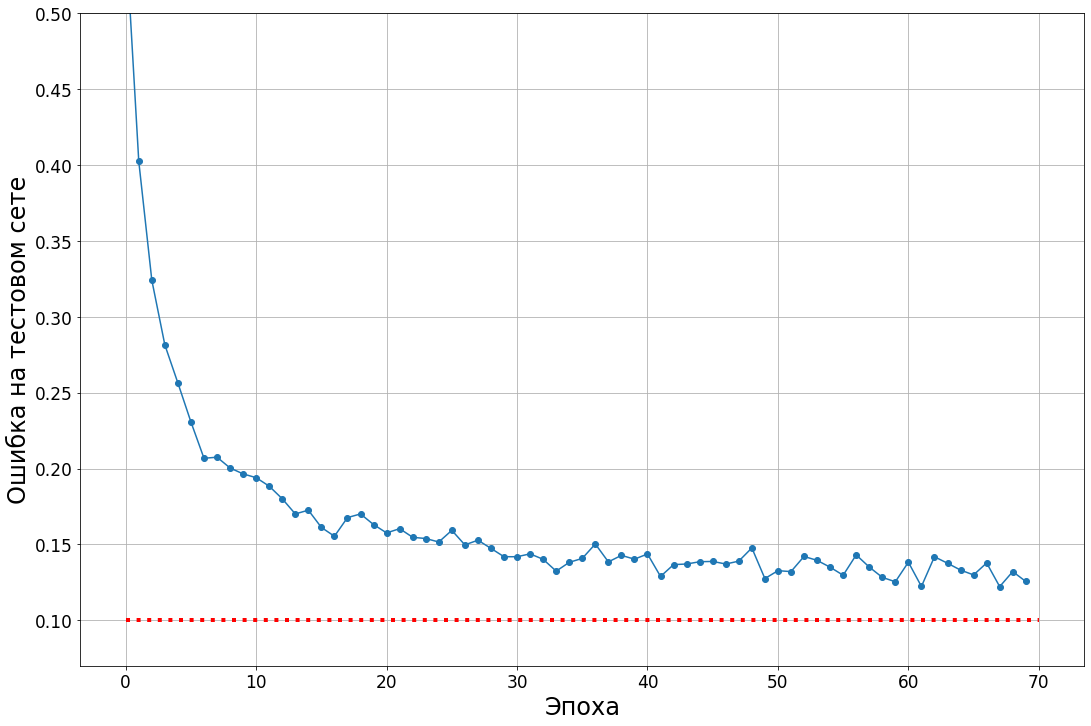

In [11]:
optimizer = torch.optim.SGD(res_net.parameters(), lr=lr, momentum=0.9, weight_decay=0.0001)
fig, ax = plt.subplots()
for epoch_idx in range(n_epochs_with_constant_learning_rate):
    test_accuracy = train_epoch(res_net, criterion, optimizer)
    test_accuracies.append(test_accuracy)
    plot_error_history(ax, test_accuracies, ymax=0.5)

### После 70 эпох обучения уменьшаем learning rate в 10 раз

In [12]:
lr = 0.01

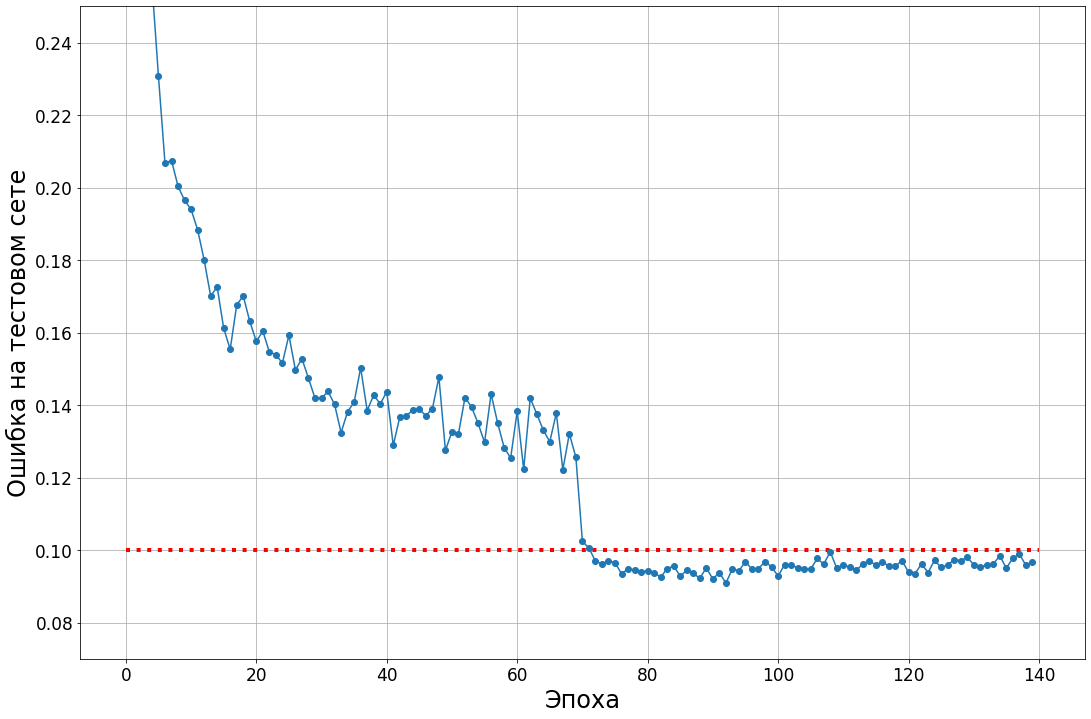

In [13]:
optimizer = torch.optim.SGD(res_net.parameters(), lr=lr, momentum=0.9, weight_decay=0.0001)
fig, ax = plt.subplots()
for epoch_idx in range(n_epochs_with_constant_learning_rate, 2 * n_epochs_with_constant_learning_rate):
    test_accuracy = train_epoch(res_net, criterion, optimizer)
    test_accuracies.append(test_accuracy)
    plot_error_history(ax, test_accuracies, ymax=0.25)

### После еще 70 эпох обучения уменьшаем learning rate еще в 10 раз

In [14]:
lr = 0.001

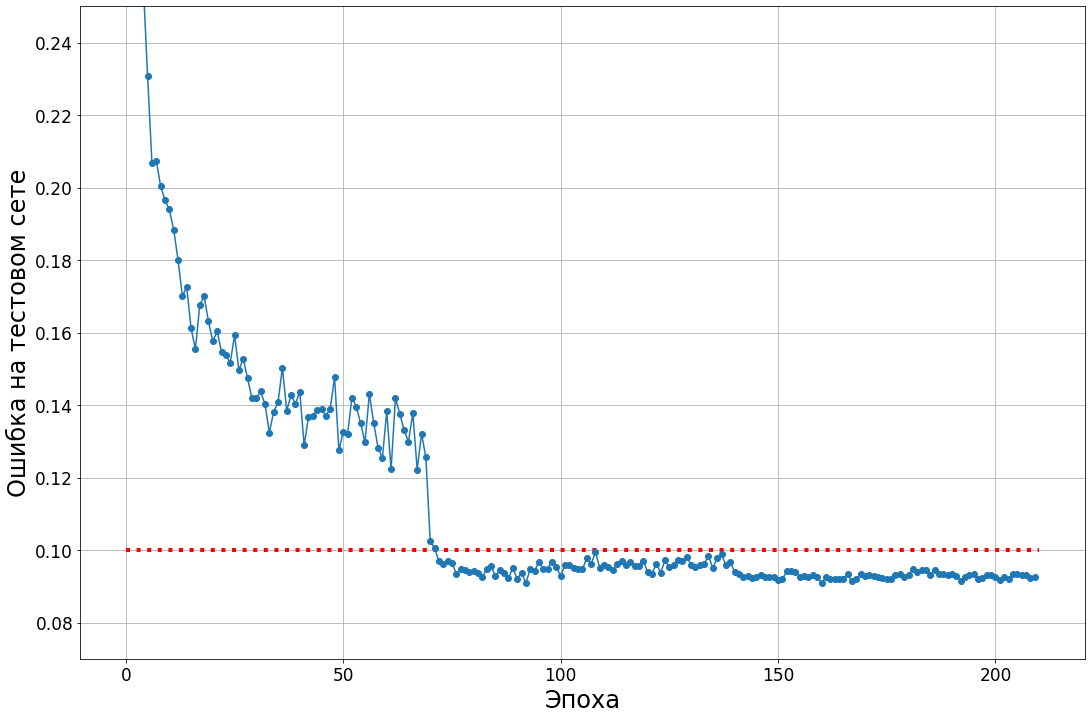

In [15]:
optimizer = torch.optim.SGD(res_net.parameters(), lr=lr, momentum=0.9, weight_decay=0.0001)
fig, ax = plt.subplots()
for epoch_idx in range(2 * n_epochs_with_constant_learning_rate, 3 * n_epochs_with_constant_learning_rate):
    test_accuracy = train_epoch(res_net, criterion, optimizer)
    test_accuracies.append(test_accuracy)
    plot_error_history(ax, test_accuracies, ymax=0.25)

### Начиная с 72-й эпохи обучения, на всех эпохах ошибка на тестовом сете ниже 10.0%

In [22]:
import numpy as np
all(np.array(test_accuracies)[72:] > 0.90)

True

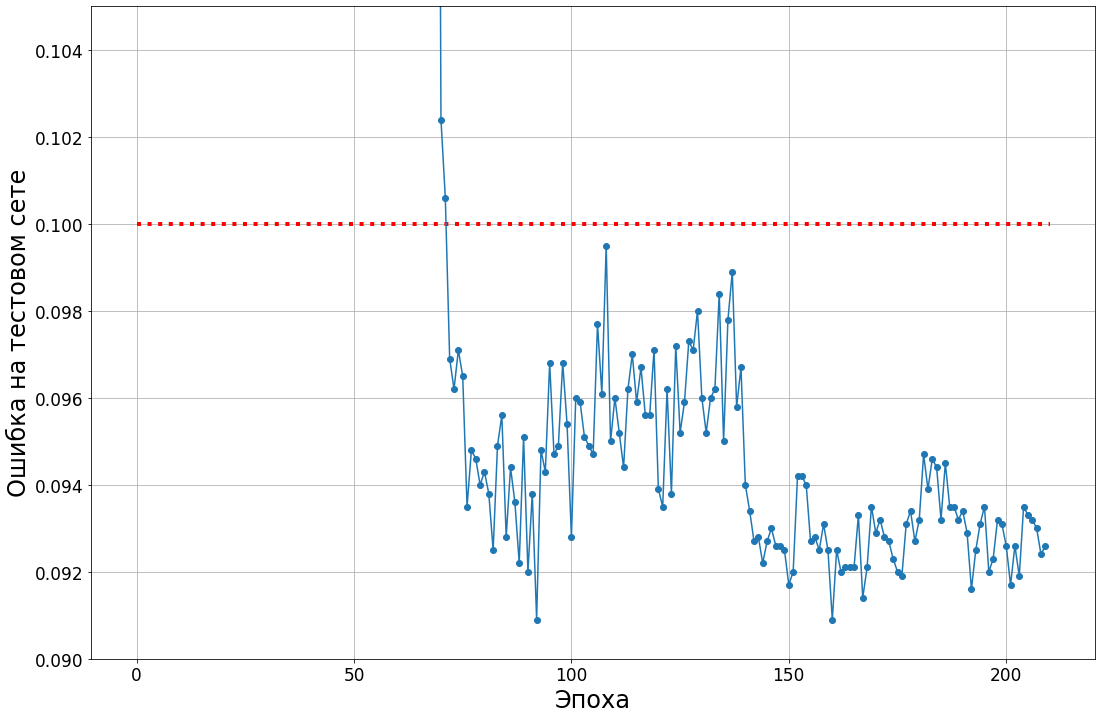

In [21]:
fig, ax = plt.subplots()
plot_error_history(ax, test_accuracies, ymin=0.09, ymax=0.105)

### Сохраним обученную модель

In [25]:
torch.save(res_net.state_dict(), './res_net_20.model')

### Загрузим и проверим точность у сохраненной модели

In [24]:
from loader import testloader
from train import get_accuracy

In [26]:
saved_model = ResNet20()
saved_model.load_state_dict(torch.load('./res_net_20.model'))

<All keys matched successfully>

In [30]:
saved_model.cuda()
print(f'saved res_net_20 model has test dataset accuracy: {get_accuracy(saved_model, testloader)}')

saved res_net_20 model has test dataset accuracy: 0.9074000000000002
